In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [486]:
df = pd.read_excel('adoptionseries2_with_noise.xlsx')

In [487]:
from sklearn.linear_model import LinearRegression
Y = df.iloc[:,1]
#At = np.array(df['A(t)']
At = [0]
Atsquared = [0]
for i in range(1,len(Y)):
    At.append(At[i-1]+Y[i-1])
    Atsquared.append( At[i]**2)
X = np.column_stack((At , Atsquared))
LR = LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [493]:
a = LR.intercept_
b = LR.coef_[0]
c = LR.coef_[1]

## Add coefficients here p,q, M

p = ((b**2 - 4*a*c)**0.5 - b)/2
q = ((b**2 - 4*a*c)**0.5 + b)/2
M = -q/c
print(f'p = {p}')
print(f'q = {q}')
print(f'M = {M}')

p = 0.0027924053944219235
q = 0.21409748324219813
M = 34.40472892567334


-----

In [496]:
Newlist = np.zeros(31)
Newlist[14] = At[13] + Y[13]
new_Y = np.zeros(31)
new_Y[14] = a + b * Newlist[14] + c * Newlist[14]*Newlist[14]

for i in range(15,31):
    Newlist[i] = Newlist[i-1] + new_Y[i-1]
    new_X = np.column_stack((Newlist,Newlist*Newlist))
    new_Y[i] = LR.predict(new_X[i].reshape(1,2))

In [497]:
print(f'N(30) = {new_Y[29]}')

N(30) = 0.973841475615864


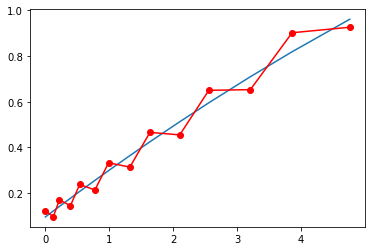

In [498]:
from scipy.optimize import curve_fit

def func(x,a,b,c):
    return (a + b*x + c*x**2)

#guess = [0.1*0.02,0.25,-0.5/100]
guess = [a,b,c]
y=[]
for i in range(14):
    y.append(func(At[i],guess[0],guess[1],guess[2]))
    
# plt.plot(At,y)
# plt.plot(At,Y)

coef, cov = curve_fit(func,At,y,guess)

y_new = []
for i in range(14):
    y_new.append(func(At[i],coef[0],coef[1],coef[2]))

plt.plot(At,y_new)
plt.plot(At,Y,'r',marker = 'o')

In [500]:
p = a/100
q = b + p
print(f'p = {p}')
print(f'q = {q}')

p = 0.0009607195064567414
q = 0.21226579735423295


In [422]:
y_pred = np.zeros(31)
Newlist[14] = At[13] + Y[13]
y_pred[14] = coef[0] + coef[1] * Newlist[14] + M*coef[2]/100 * Newlist[14]*Newlist[14]

for i in range(15,31):
    Newlist[i] = Newlist[i-1] + y_pred[i-1]
    new_X = np.column_stack((Newlist,Newlist*Newlist))
    y_pred[i] = func(new_X[i,0],coef[0],coef[1],M*coef[2]/100)

In [494]:
print(f'N(30) = {y_pred[29]}')

N(30) = 5.174248411770308


In [484]:
def func2(t, p, q):
    return ((100*(1 - np.exp(-(p+q)*t))/(1+(q/p)*np.exp(-(p+q)*t))) - (100*(1 - np.exp(-(p+q)*(t-1)))/(1+(q/p)*np.exp(-(p+q)*(t-1)))))

df2 = pd.read_excel('adoptionseries2_with_noise.xlsx') 
df2 = df2.rename(columns={'N(t)':'Nt'})
X = df2.iloc[:,1]
y = df2.iloc[:,0]

coef2, cov2 = curve_fit(func2,y,X)
p,q = coef2
print(f'N(30) : {func2(30, p, q)}')

print(f'p = {p}')
print(f'q = {q}')
      

N(30) : 4.5043101284856775
p = 0.000955449837668786
q = 0.1785701129877397


-------
Optional Questions:

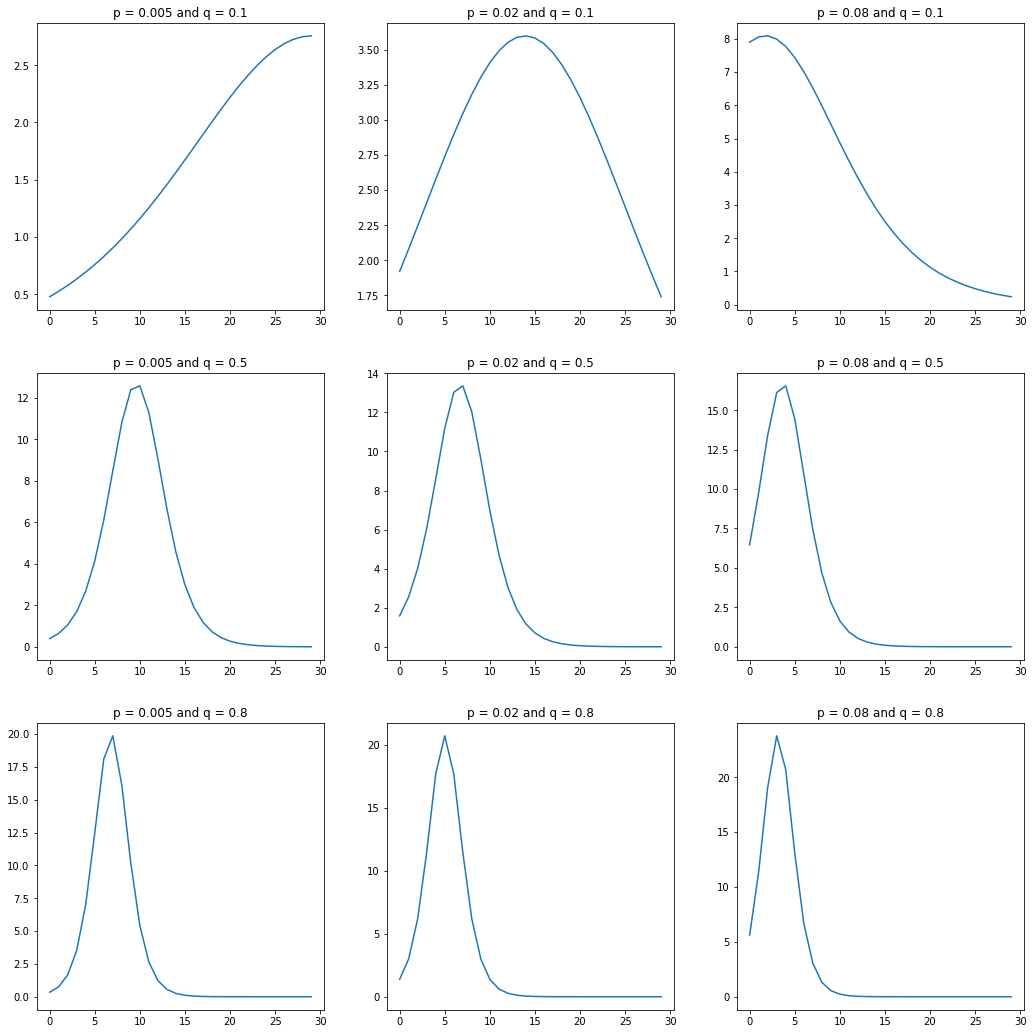

In [559]:
p = [0.005, 0.02 , 0.08]
q = [0.1, 0.5 , 0.8]

t = [i for i in range(30)]
y = []
fig,ax = plt.subplots(3,3)
for k in range(3):
    for j in range(3):
        y = []
        for i in range(30):
            y.append(func2(i,p[j],q[k]))
        ax[k,j].plot(t,y)
        ax[k,j].set_title(f'p = {p[j]} and q = {q[k]}')
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad = 3)

Higher P ==> Higher Peak
Higher P ==> Earlier peak because you have more innovators ( people who will use the product upon launch ) 
Higher q ==> steeper fall and faster decay

------

In [549]:
from sklearn.linear_model import LinearRegression
Y = df.iloc[:,1]
#At = np.array(df['A(t)']
At = [0]
Atsquared = [0]
for i in range(1,len(Y)):
    if i%2 == 0:
            At.append((At[i-1]+Y[i-1])*1.1)
    else: 
            At.append((At[i-1]+Y[i-1])*0.9)
            
    Atsquared.append( At[i]**2)
    
X = np.column_stack((At , Atsquared))
LR = LinearRegression()
LR.fit(X,Y)

a = LR.intercept_
b = LR.coef_[0]
c = LR.coef_[1]

## Add coefficients here p,q, M

p = ((b**2 - 4*a*c)**0.5 - b)/2
q = ((b**2 - 4*a*c)**0.5 + b)/2
M = -q/c
print('With 10% shuffling noise: \n')
print(f'p = {p}')
print(f'q = {q}')
print(f'M = {M}')

With 10% shuffling noise: 

p = 0.0010507518943219801
q = 0.2037693440423235
M = 95.56966747469147


In [551]:
from sklearn.linear_model import LinearRegression
Y = df.iloc[:,1]
#At = np.array(df['A(t)']
At = [0]
Atsquared = [0]
for i in range(1,len(Y)):
    if i%2 == 0:
            At.append((At[i-1]+Y[i-1])*1.2)
    else: 
            At.append((At[i-1]+Y[i-1])*0.8)
            
    Atsquared.append( At[i]**2)
    
X = np.column_stack((At , Atsquared))
LR = LinearRegression()
LR.fit(X,Y)

a = LR.intercept_
b = LR.coef_[0]
c = LR.coef_[1]

## Add coefficients here p,q, M

p = ((b**2 - 4*a*c)**0.5 - b)/2
q = ((b**2 - 4*a*c)**0.5 + b)/2
M = -q/c
print('With 20% shuffling noise: \n')
print(f'p = {p}')
print(f'q = {q}')
print(f'M = {M}')

With 20% shuffling noise: 

p = 0.0002843343910242657
q = 0.21262705575917318
M = 351.1768348687756


In [554]:
from sklearn.linear_model import LinearRegression
Y = df.iloc[:,1]
#At = np.array(df['A(t)']
At = [0]
Atsquared = [0]
for i in range(1,len(Y)):
    if i%2 == 0:
            At.append((At[i-1]+Y[i-1])*1.3)
    else: 
            At.append((At[i-1]+Y[i-1])*0.7)
            
    Atsquared.append( At[i]**2)
    
X = np.column_stack((At , Atsquared))
LR = LinearRegression()
LR.fit(X,Y)

a = LR.intercept_
b = LR.coef_[0]
c = LR.coef_[1]

## Add coefficients here p,q, M

p = ((b**2 - 4*a*c)**0.5 - b)/2
q = ((b**2 - 4*a*c)**0.5 + b)/2
M = -q/c
print('With 30% shuffling noise: \n')
print(f'p = {p}')
print(f'q = {q}')
print(f'M = {M}')

With 30% shuffling noise: 

p = 0.002012897676165304
q = 0.2544822831756179
M = 45.45942983211487


----

In [556]:
p = [0.005, 0.02 , 0.08]
q = [0.1, 0.5 , 0.8]
for i in range(3):
    for j in range(3):
        print(f'N(30) for p = {p[i]} and q = {q[j]} : {func2(30, p[i], q[j])}')

N(30) for p = 0.005 and q = 0.1 : 2.748499534169021
N(30) for p = 0.005 and q = 0.5 : 0.0017469697699823428
N(30) for p = 0.005 and q = 0.8 : 6.46959747996334e-07
N(30) for p = 0.02 and q = 0.1 : 1.5935146431915683
N(30) for p = 0.02 and q = 0.5 : 0.0002976984154798856
N(30) for p = 0.02 and q = 0.8 : 1.0792302873596782e-07
N(30) for p = 0.08 and q = 0.1 : 0.19795517561705367
N(30) for p = 0.08 and q = 0.5 : 1.5814577409400954e-05
N(30) for p = 0.08 and q = 0.8 : 5.315129669725138e-09


1- As both p and q increase, the value of N(30) goes down. This pattern holds because increasing the number of early adopters(p) will cause the trend to peak earlier and increasing the number of immitators (q) will cause the trend to subside faster because it will spread faster. 

2- Comparing the values of p and q in Q1(3) and Q1(4), I notice that the p varies negligibly and q is decreased slightly. ( 0.212 --> 0.178 ) This decrease in q means that the number of imitators is less and it will take longer for the trend to eventually subside. This represents a violation of the pattern because N(30) is greater in Q1(4) than Q1(3).  ( Roughly as if the curve in Q1(4) is lagging Q1(3) ) 